파이썬 머신러닝 완벽가이드 개정2판 ch9. 5~6 p.601-625

### **[개념 정리+코드 필사]📝**

### **05. 콘텐트 기반 필터링 실습 - TMBD 5000 영화 데이터 세트**

(1) 장르 속성을 이용한 영화 콘텐츠 기반 필터링

- 콘텐프 기반 필터링: 사용자가 좋아한 특정 영화와 비슷한 특성/속성/구성 요소 등을 가진 다른 영화를 추천
- 영화 장르 속성을 기반으로 장르 칼럼의 유사도를 비교한 뒤 높은 평점을 가지는 영화를 추천

(2) 데이터 로딩 및 가공

- 데이터 중 id, 영화제목, 장르, 평균 평점, 평점 투표수, 영화의 인기, 주요 키워드, 영화 개요 설명만 추출
- 'genres','keywords':리스트 내부의 여러 딕셔너리 형태의 문자열이라 가공 필요.--> literal_eval()+ name 키의 값만 추출하는 apply(lambda) 이용해 장르명만 list['Action','Adventure']형식으로 반환

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

movies = pd.read_csv('/content/drive/MyDrive/ESAA/OB 과제/tmdb_5000_movies.csv')
print(movies.shape)
movies.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
movies_df = movies[['id','title','genres','vote_average','vote_count','popularity','keywords','overview']]

In [3]:
pd.set_option('max_colwidth',100)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [4]:
from ast import literal_eval
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [5]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [y['name'] for y in x])
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


(3) 장르 콘텐츠 유사도 측정

- genres칼럼: 각각의 영화는 여러개의 개별 장르를 리스트로 가짐. genres를 문자열로 변환 후 genres_listeral 칼럼으로 저장, CountVectorizer기반 피처 벡터화 --> 코사인 유사도로 장르별 유사도 측정
  - 레코드 별로 타 레코드와 장르에서 코사인 유사도 값을 가지는 객체 생성
  - 장르 유사도가 높은 영화 중 평점이 높은 영화 순으로 영화를 추천

- cosine_similarity(): 기준 행과 비교 행의 코사인 유사도를 행렬로 반환
  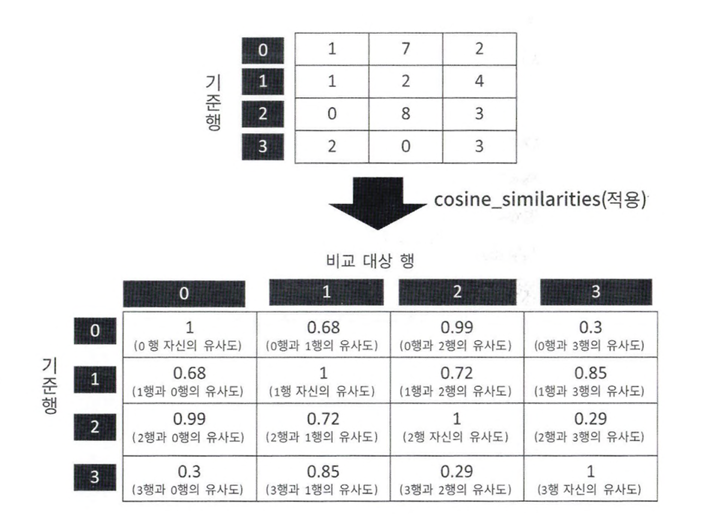
    - genre_literal칼럼을 피처 벡터화한 행렬 데이터의 행 별 유사도 정보  --> 데이터의 행별 장르 유사도 값

- 유사도 값이 높은 순으로 정렬된 행렬의 위치 인덱스를 사용해 특정 레코드와 유사도가 높은 다른 레코드를 추출가능

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자를 word 단위가 구분되는 문자열로 변환
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0.0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


In [8]:
genre_sim_sorted_ind = genre_sim.argsort()[:,::-1]
print(genre_sim_sorted_ind[:1])

[[   0   46 3494 ... 3331 3333 2031]]


(4) 장르 콘텐츠 필터링을 이용한 영화 추천

- find_sim_movie(): 장르 유사도에 따라 영화를 추천하는 함수 생성
- 유사도가 높은 많은 후보군을 선정한 뒤, 영화의 평점에 따라 필터링해서 최종 추천하는 방식
  - 평점 정보 vote_average는 평점을 평균한 데이터로 소수 관객의 높은 평점으로 왜곡될 수 있음 --> 평가 횟수도 반영
  - 가중평점 이용: v(평점 투표 횟수), m(최소 투표 횟수), R(평균 평점), C(전체 영화의 평균평점)
    - 가중평점(Weighted Rating) = (v/(v+m))* R + (m/(v+m)) * C

- 장르 기반 필터링 예제를 더 다양한 콘텐츠 기반으로 확장할 수 있음

In [9]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
  # 인자로 입력된 movies_df DataFrame에서 'title'칼럼이 입력된 title_name 값인 DataFrame 추출
  title_movie = df[df['title']==title_name]

  # title_name을 가진 DataFrame의 index 객체를 ndarray로 반환하고
  # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n개의 index 추출
  title_index = title_movie.index.values
  similar_indexes = sorted_ind[title_index, :(top_n)]

  # 추출된 top_n index 출력, top_n index는 2차원 데이터임
  # dataframe에서 index로 사용하기 위해서 1차원 array로 변경
  print(similar_indexes)
  similar_indexes = similar_indexes.reshape(-1)

  return df.iloc[similar_indexes]

In [10]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title','vote_average']]

[[1881 3378 3866 1370 1464  588 3887 3594 2839  892]]


,title,vote_average
1881,The Shawshank Redemption,8.5
3378,Auto Focus,6.1
3866,City of God,8.1
1370,21,6.5
1464,Black Water Transit,0.0
588,Wall Street: Money Never Sleeps,5.8
3887,Trainspotting,7.8
3594,Spring Breakers,5.0
2839,Rounders,6.9
892,Casino,7.8


In [11]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average',ascending=False)[:10]

,title,vote_average,vote_count
4662,Little Big Top,10.0,1
3519,Stiff Upper Lips,10.0,1
4045,"Dancer, Texas Pop. 81",10.0,1
4247,Me You and Five Bucks,10.0,2
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
1881,The Shawshank Redemption,8.5,8205
2970,There Goes My Baby,8.5,2
3337,The Godfather,8.4,5893
2796,The Prisoner of Zenda,8.4,11


In [12]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:', round(C,3), 'm:', round(m,3))

C: 6.092 m: 370.2


In [14]:
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
  v = record['vote_count']
  R = record['vote_average']

  return ((v/(v+m))*R)+((m/(m+v))*C)

movies_df['weighted_vote'] = movies.apply(weighted_vote_average, axis=1)

In [15]:
movies_df[['title', 'vote_average','weighted_vote','vote_count']].sort_values('weighted_vote', ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [16]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
  title_movie = df[df['title']==title_name]
  title_index = title_movie.index.values

  # top_n의 2배에 해당하는 장르 유사성이 높은 인덱스 추출
  similar_indexes = sorted_ind[title_index, :(top_n*2)]
  similar_indexes = similar_indexes.reshape(-1)
  # 기준 영화 인덱스는 제외
  similar_indexes = similar_indexes[similar_indexes != title_index]

  # top_n의 2배에 해당하는 후보군에서 weighted_vote가 높은 순으로 top_n만큼 추출
  return df.iloc[similar_indexes].sort_values('weighted_vote',ascending = False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title','vote_average','weighted_vote']]

,title,vote_average,weighted_vote
1881,The Shawshank Redemption,8.5,8.396052
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
3887,Trainspotting,7.8,7.591009
883,Catch Me If You Can,7.7,7.557097
892,Casino,7.8,7.423040
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525


### **06. 아이템 기반 최근접 이웃 협업 필터링 실습**

- 일반적으로 사용자 기반보다 아이템 기반이 추천 정확도가 뛰어남

(1) 데이터 가공 빛 변환

- ratings.csv 데이터 같이 사용자와 아이템 간의 평점에 기반해 추천함.
- ratings.pivot_table('rating', index='', columns=''): 행 레벨 형태의 원본 데이터를 모든 사용자(userid)를 행으로, 모든 영화(movieid)를 칼럼으로 변환. 데이터는 rating 칼럼에 있는 값 할당. 칼럼명 부여가능
- 사용자가 평점을 매기지 않은 영화가 많으므로 NaN값이 많음. 최소평점이 0.5이므로 NaN은 0으로 변환
- 칼럼을 movieid -> movietitle: movies 데이터를 조인해 title을 가져옴
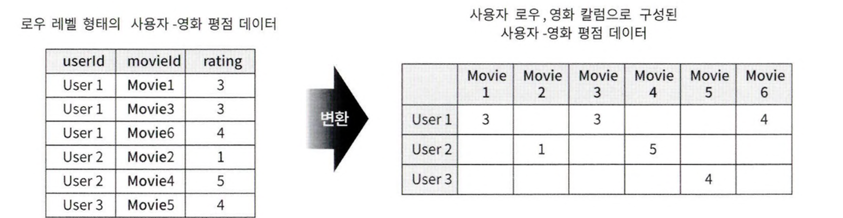


In [1]:
import pandas as pd
import numpy as np

movies = pd.read_csv('/content/drive/MyDrive/ESAA/OB 과제/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ESAA/OB 과제/ratings.csv')

print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [2]:
ratings = ratings[['userId','movieId','rating']]
ratings_matrix = ratings.pivot_table('rating',index='userId',columns='movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# title 칼럼을 얻기 위해 movies와 조인
ratings_movies = pd.merge(ratings, movies, on='movieId')

# columns = 'title'로 title 칼럼으로 피벗 수행
ratings_matrix = ratings_movies.pivot_table('rating',index='userId',columns='title')

# NaN값을 모두 0으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(2) 영화 간 유사도 산출

- 영화 간의 유사도 측정: 코사인 유사도 기반. 사이킷런의 cosine_similarity()
  - cosine_similarity는 행 기준이므로 기존 행(userid)과 열(영화명)을 전치: transpose()

- 아이템 기반 유사도 데이터는 사용자의 평점 정보를 모두 취합해 영화에 따라 유사한 다른 영화를 추천함



In [4]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity()로 반환된 넘파이 행렬을 영화명을 매핑해 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns, columns = ratings_matrix.columns)

print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [6]:
item_sim_df['Godfather, The (1972)'].sort_values(ascending = False)[:6]

,"Godfather, The (1972)"
title,
"Godfather, The (1972)",1.000000
"Godfather: Part II, The (1974)",0.821773
Goodfellas (1990),0.664841
One Flew Over the Cuckoo's Nest (1975),0.620536
Star Wars: Episode IV - A New Hope (1977),0.595317
Fargo (1996),0.588614


In [7]:
item_sim_df['Inception (2010)'].sort_values(ascending = False)[1:6]

,Inception (2010)
title,
"Dark Knight, The (2008)",0.727263
Inglourious Basterds (2009),0.646103
Shutter Island (2010),0.617736
"Dark Knight Rises, The (2012)",0.617504
Fight Club (1999),0.615417


(3) 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천

- 개인이 아직 관람하지 않은 영화를 추천: 관람하지 않은 영화에 대해 아이템 유사도와 기존 관람 영화의 평점 데이터 기반으로 새로운 예측 평점 계산, 가장 높은 평점의 영화 추천
- 개인화된 예측 평점:
  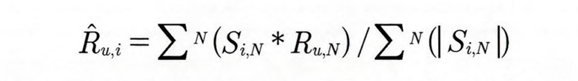
  - $R ̂ _{u,i}$: 사용자 u, 아이템 i의 개인화된 예측 평점 값
  - $S_{i,N}$: 아이템 i와 가장 유사도가 높은 Top-N개 아이템의 유사도 벡터
  - $R_{u,i}$: 사용자 u의 아이템 i와 가장 유사도가 높은 top-N개 아이템에 대한 실제 평점 벡터
  - N: 아이템의 최근접 이웃 범위 계수

- predicting_rating():영화간의 유사도 행렬과 사용자-영화 평점 행렬을 활용해 사용자 별 최적화된(개인화된) 평점 스코어를 예측하는 함수
- 예측 평점: 사용자별 영화의 실제 평점과 영화의 코사인 유사도를 내적한 값 --> 기존 0(NaN) 값이 예측에서 값 부여됨. 실제 평점에 비해선 작을 수 있음
  - 실제 평점과의 차이 확인: MSE 평가지표
    - 기존 평점이 부여된 데이터에만 오차 정도 측정
    - MSE를 감소시키는 방향으로 개선

- predicting_rating(n=20) 변경: 특정 영화와 가장 비슷한 유사도의 영화에 대해서만 유사도 벡터 적용. n인자를 넣어 Top-N 유사도 영화 벡터만 예측값 계산
  - for문으로 반복해 개별 예측값 구해야함
  - MSE가 많이 향상됨

- 9번 사용자가 어떤 영화 좋아하는지 확인(평점 높은 순 나열) -> 평점을 주지 않은 영화 리스트 객체로 반환 -> 사용자별 아이템 유사도 기반 예측 평점 데이터 세트를 같이 이용해 최종적으로 영화 추천 (recomm_movie_by_userid())


In [8]:
def predict_rating(ratings_arr, item_sim_arr):
  ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
  return ratings_pred

In [9]:
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data = ratings_pred, index = ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [10]:
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE를 구함.
def get_mse(pred, actual):
  # 평점이 있는 실제 영화만 추출
  pred = pred[actual.nonzero()].flatten()
  actual = actual[actual.nonzero()].flatten()
  return mean_squared_error(pred, actual)

print('아이템 기반 모든 최근접 이웃 MSE:', get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 최근접 이웃 MSE: 9.895354759094706


In [11]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
  # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
  pred = np.zeros(ratings_arr.shape)

  # 사용자-아이템 평점 행렬의 열 크기만큼 루프 수행
  for col in range(ratings_arr.shape[1]):
    # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 인덱스 반환
    top_n_items = [np.argsort(item_sim_arr[:,col])[:-n-1:-1]]
    # 개인화된 예측 평점을 계산
    for row in range(ratings_arr.shape[0]):
      pred[row, col] = item_sim_arr[col,:][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
      pred[row, col] /=np.sum(np.abs(item_sim_arr[col,:][top_n_items]))

  return pred

In [12]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=20)
print('아이템 기반 최근접 Top-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values))

# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)

<ipython-input-11-b81918c1f8ce>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[row, col] = item_sim_arr[col,:][top_n_items].dot(ratings_arr[row, :][top_n_items].T)


아이템 기반 최근접 Top-20 이웃 MSE:  3.694409449382562


In [13]:
user_rating_id = ratings_matrix.loc[9,:]
user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10]

,9
title,
Adaptation (2002),5.0
Austin Powers in Goldmember (2002),5.0
Back to the Future (1985),5.0
Citizen Kane (1941),5.0
"Lord of the Rings: The Fellowship of the Ring, The (2001)",5.0
"Lord of the Rings: The Two Towers, The (2002)",5.0
"Producers, The (1968)",5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),5.0
Elling (2001),4.0


In [16]:
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화 정보를 추출해 Series로 반환함.
    # 반환된 user_rating은 영화명(title)을 인덱스를 가지는 Series 객체임.
    user_rating = ratings_matrix.loc[userId, :]

    #user_rating이 0보다 크면 기존에 관람한 영화임. 대상 인덱스를 추출해 list 객체로 만듦.
    already_seen = user_rating[ user_rating > 0].index.tolist()

    # 모든 영화명을 list 객체로 만듦.
    movies_list = ratings_matrix.columns.tolist()

    # list comporehension으로 already_seen에 해당하는 영화는 movies_list에서 제외함.
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]

    return unseen_list

In [17]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n = 10):
    # 예측 평점 DataFrame에서 사용자id 인덱스와 unseen_list로 들어온 영화명 칼럼을 추출해
    # 가장 예측 평점이 높은 순으로 정렬함.
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

# 사용자가 관람하지 않은 영화명 추출
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 최근접 이웃 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이터를 DataFrame으로 생성.
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index,
                             columns=['pred_score'])

recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591
